<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/9_Data_Capstone_Project_Finance_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_pickle('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/all_banks') 
print(df)

Bank Ticker    BAC                       ...    WFC                        
Stock Info    Open   High    Low  Close  ...   High    Low  Close    Volume
Date                                     ...                               
2006-01-03   46.92  47.18  46.15  47.08  ...  31.98  31.20  31.90  11016400
2006-01-04   47.00  47.24  46.45  46.58  ...  31.82  31.36  31.53  10871000
2006-01-05   46.58  46.83  46.32  46.64  ...  31.56  31.31  31.50  10158000
2006-01-06   46.80  46.91  46.35  46.57  ...  31.78  31.38  31.68   8403800
2006-01-09   46.72  46.97  46.36  46.60  ...  31.82  31.56  31.68   5619600
...            ...    ...    ...    ...  ...    ...    ...    ...       ...
2015-12-24   17.32  17.38  17.22  17.27  ...  55.09  54.71  54.82   4999417
2015-12-28   17.22  17.23  16.98  17.13  ...  54.78  54.17  54.68   8288841
2015-12-29   17.25  17.35  17.16  17.28  ...  55.35  54.99  55.29   7894876
2015-12-30   17.20  17.24  17.04  17.05  ...  55.31  54.79  54.89   8016893
2015-12-31  

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [ ]:
tickers = list(df.columns.levels[0])

** What is the max Close price for each bank's stock throughout the time period?**

In [ ]:
dfaux = df.xs('Close', axis=1, level='Stock Info')
print(dfaux.max())

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.

In [ ]:
returns = dfaux.pct_change()
 
for i in range(len(returns.columns)):
    returns.rename(columns = {returns.columns[i] : returns.columns[i] + ' Return'}, inplace = True)

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

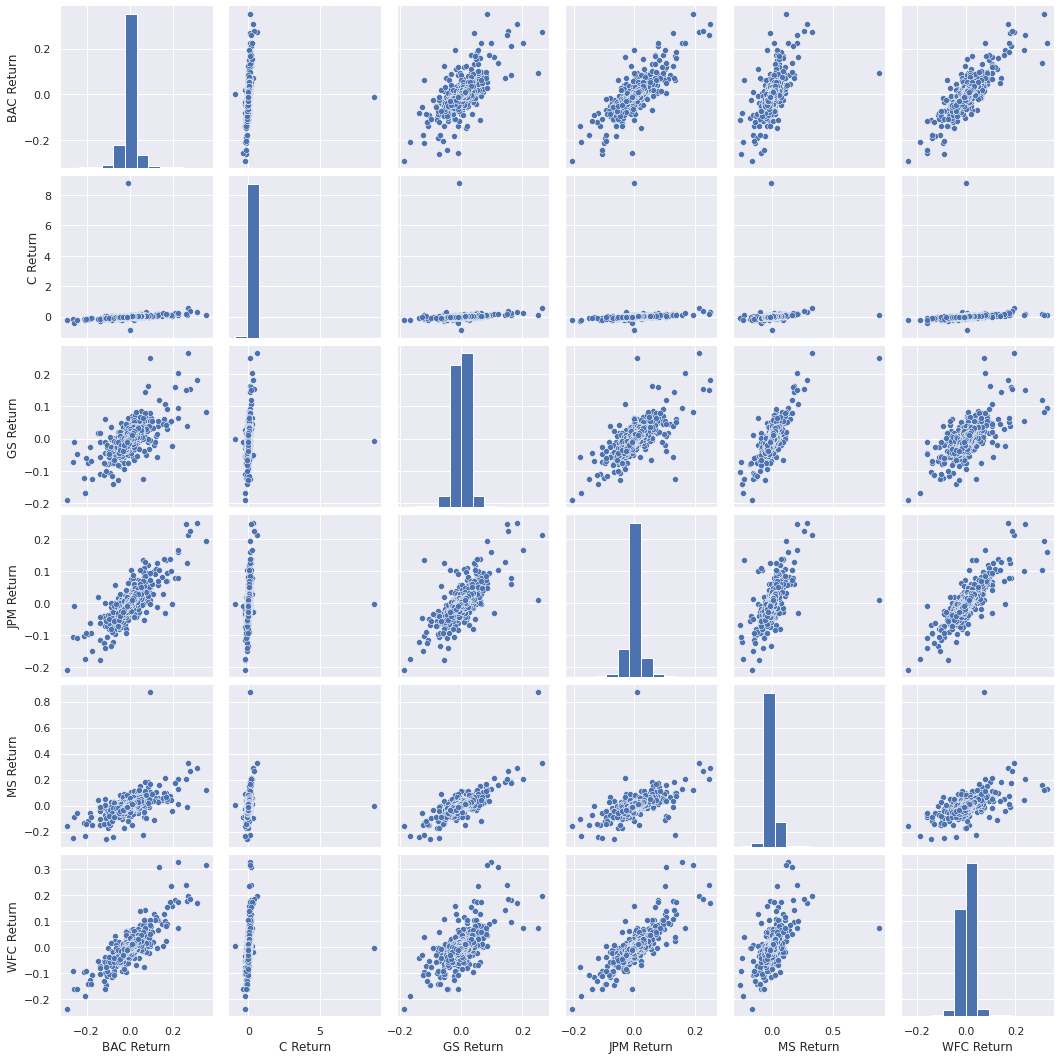

In [ ]:
sns.pairplot(returns, diag_kws = {'alpha':1, 'bins':12})
plt.show()

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

In [ ]:
print(returns.idxmin())
print(returns.idxmax())

Bank Ticker
BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]
Bank Ticker
BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]


Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period?

In [ ]:
print(returns.std())
print(returns[returns.index.year == 2015].std())

Bank Ticker
BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64
Bank Ticker
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64


** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


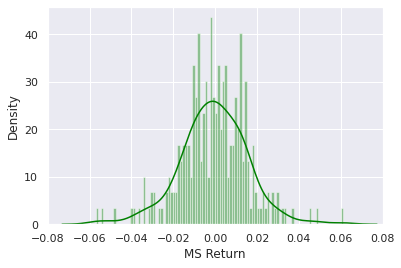

In [ ]:
sns.distplot(returns[returns.index.year == 2015]['MS Return'], kde=True, bins=100, color='green')
plt.xlim(-0.08, 0.08)
plt.show()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


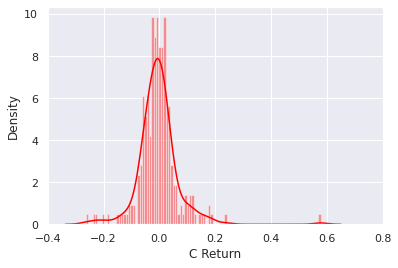

In [ ]:
sns.distplot(returns[returns.index.year == 2008]['C Return'], kde=True, bins=100, color='red')
plt.xlim(-0.4, 0.8)
plt.show()

Create a line plot showing Close price for each bank for the entire index of time.

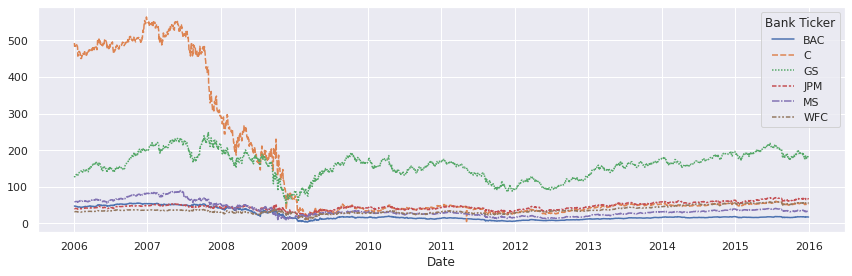

In [ ]:
fig, axes = plt.subplots(figsize=(12, 4))
sns.lineplot(axes=axes, data=dfaux)
plt.tight_layout()
plt.show()

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [ ]:
BAC2008 = dfaux[dfaux.index.year == 2008][['BAC']]
BAC2008['30D mm'] = BAC2008['BAC'].rolling(window = 30).mean()

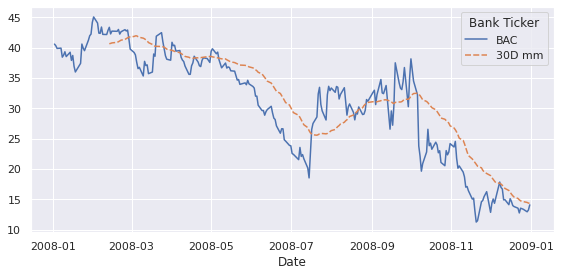

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4))
sns.lineplot(axes=axes, data=BAC2008)
plt.tight_layout()
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.

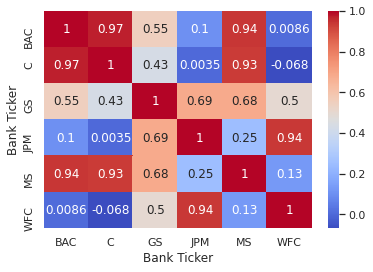

In [ ]:
sns.heatmap(dfaux.corr(), cmap='coolwarm', annot=True)
plt.show()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

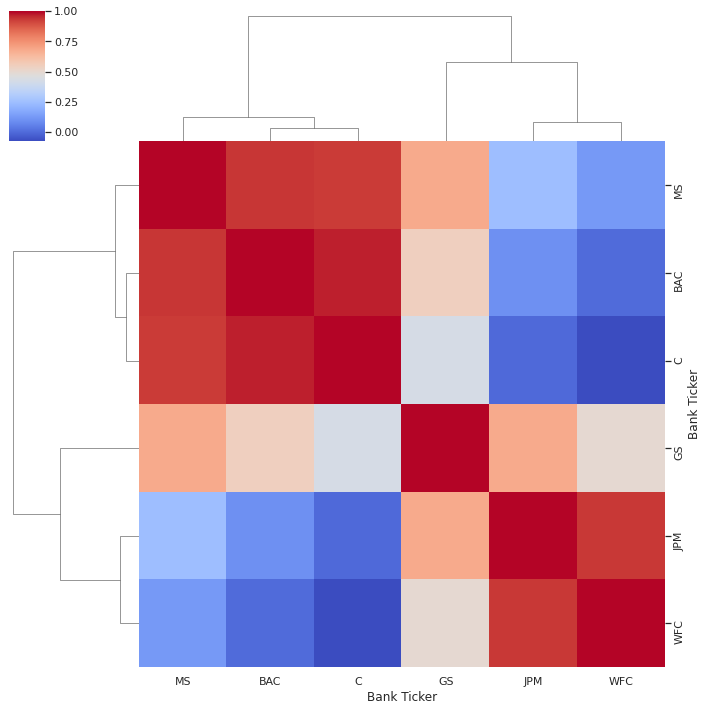

In [ ]:
sns.clustermap(dfaux.corr(), cmap='coolwarm')
plt.show()